# Quality Control for the Vaisala Air Quality Transmitter (AQT-530)

[CROCUS](https://crocus-urban.org/) utilizes the Vasiala WXT-536 within all Chicago Micronet nodes. <br>
Data are collected at the instrument via [Waggle Plugin Scripts](https://github.com/jrobrien91/waggle-aqt), which incorporate the sensors into the Waggle node. <br>
Data collected at each site are accumulated into daily files via [ingest scripts](https://github.com/CROCUS-Urban/ingests/blob/main/scripts/aqt-ingest.py) 
and hosted on the [CROCUS Thredds Server](https://thredds.crocus-urban.org/thredds/catalog/aqt/neiu-aqt-a1/catalog.html)

In [1]:
import xarray as xr
from xarray.backends import NetCDF4DataStore
import act
import glob

In [2]:
import random

In [3]:
import sage_data_client

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np
from scipy.stats.mstats import pearsonr

In [6]:
DATE = "20230801"

## Open All the Files

In [7]:
aqt_ds = xr.open_mfdataset("/Users/jrobrien/ANL/Instruments/Vaisala_AQT530/data/crocus/*")

In [8]:
aqt_ds.load()

<xarray.Dataset> Size: 4MB
Dimensions:      (time: 43671)
Coordinates:
  * time         (time) datetime64[ns] 349kB 2023-08-01T01:40:59.708306096 .....
Data variables:
    pm2.5        (time) float64 349kB 2.9 2.9 2.9 2.9 2.9 ... 1.4 1.4 1.4 1.4
    pm1.0        (time) float64 349kB 2.1 2.1 2.1 2.1 2.1 ... 0.8 0.8 0.8 0.8
    pm10.0       (time) float64 349kB 5.1 5.1 5.1 5.1 5.1 ... 3.6 3.6 3.6 3.6
    no           (time) float64 349kB 0.032 0.032 0.033 ... 0.044 0.044 0.044
    o3           (time) float64 349kB 0.046 0.046 0.046 ... 0.046 0.046 0.046
    no2          (time) float64 349kB 0.018 0.018 0.018 0.018 ... 0.02 0.02 0.02
    co           (time) float64 349kB 0.107 0.109 0.109 ... 0.106 0.108 0.108
    temperature  (time) float64 349kB 23.4 23.3 23.4 23.4 ... 20.8 20.8 20.8
    humidity     (time) float64 349kB 53.3 53.3 53.2 53.3 ... 57.3 57.5 57.7
    pressure     (time) float64 349kB 999.4 999.4 999.4 ... 998.4 998.4 998.4
    dewpoint     (time) float64 349kB 13.37 13.28 13.34 ... 12.06 12.11 12.16
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    CAMS_tag:     CMS-AQT-001
    datastream:   CMS_aqt580_NEIU_a1
    datalevel:    a1
    node:         W08D
    latitude:     41.9804526
    longitude:    -87.7196038

In [9]:
wxt_ds = xr.open_mfdataset("/Users/jrobrien/ANL/Instruments/Vaisala_WXT536/data/crocus/*")

In [10]:
wxt_ds.load()

<xarray.Dataset> Size: 21MB
Dimensions:        (time: 258598)
Coordinates:
  * time           (time) datetime64[ns] 2MB 2023-08-01T01:40:00 ... 2023-08-...
Data variables:
    temperature    (time) float64 2MB 23.1 23.1 23.1 23.1 ... 17.5 17.5 17.5
    humidity       (time) float64 2MB 54.1 54.1 54.1 54.2 ... 67.6 67.6 67.6
    pressure       (time) float64 2MB 997.4 997.4 997.4 ... 994.4 994.4 994.4
    rainfall       (time) float64 2MB 60.33 60.33 60.33 ... 130.4 130.4 130.4
    dewpoint       (time) float64 2MB 13.32 13.32 13.32 ... 11.44 11.44 11.44
    wetbulb        (time) float64 2MB 16.8 16.8 16.8 16.81 ... 13.81 13.81 13.81
    wind_dir_10s   (time) float64 2MB nan 94.0 82.0 99.0 ... 346.0 1.0 29.83
    wind_mean_10s  (time) float64 2MB nan 0.5 0.5 0.6 ... 3.2 2.0 1.617 1.658
    wind_max_10s   (time) float64 2MB 0.6 0.8 0.6 0.7 0.8 ... 3.2 2.0 1.9 2.2
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    node:         W08D
    CAMS_tag:     CMS-WXT-002
    datastream:   CMS_wxt536_NEIU_a1
    datalevel:    a1
    latitude:     41.9804526
    longitude:    -87.7196038

## Create a display

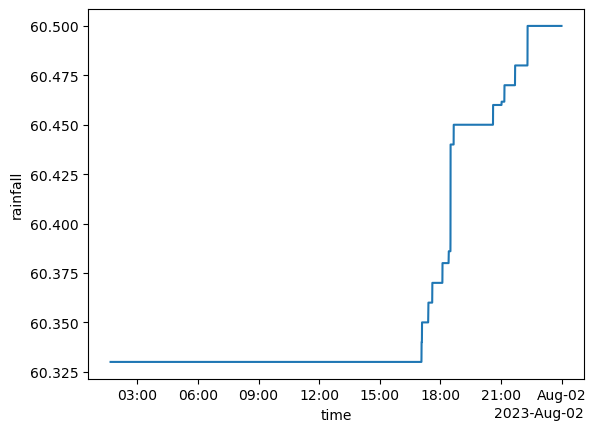

In [11]:
wxt_ds.rainfall.sel(time=slice(DATE, DATE)).plot()

In [12]:
wxt_1min_ds = wxt_ds.resample(time="1Min").mean()

In [13]:
wxt_1min_ds.sel(time=slice(DATE, DATE))

<xarray.Dataset> Size: 107kB
Dimensions:        (time: 1340)
Coordinates:
  * time           (time) datetime64[ns] 11kB 2023-08-01T01:40:00 ... 2023-08...
Data variables:
    temperature    (time) float64 11kB 23.1 23.1 23.1 23.1 ... 27.7 27.66 27.6
    humidity       (time) float64 11kB 54.18 54.3 54.3 ... 50.39 50.54 50.69
    pressure       (time) float64 11kB 997.4 997.4 997.5 ... 996.4 996.4 996.4
    rainfall       (time) float64 11kB 60.33 60.33 60.33 ... 60.5 60.5 60.5
    dewpoint       (time) float64 11kB 13.35 13.38 13.38 ... 16.47 16.48 16.47
    wetbulb        (time) float64 11kB 16.81 16.83 16.83 ... 19.98 19.98 19.96
    wind_dir_10s   (time) float64 11kB 88.6 95.17 117.0 ... 207.0 201.6 222.8
    wind_mean_10s  (time) float64 11kB 0.62 1.333 1.333 ... 2.733 2.951 3.285
    wind_max_10s   (time) float64 11kB 0.7833 1.883 1.4 0.9 ... 3.467 4.15 3.583
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    node:         W08D
    CAMS_tag:     CMS-WXT-002
    datastream:   CMS_wxt536_NEIU_a1
    datalevel:    a1
    latitude:     41.9804526
    longitude:    -87.7196038

In [14]:
aqt_1min_ds = aqt_ds.resample(time="1Min").mean()

In [15]:
aqt_1min_ds.sel(time=slice(DATE, DATE))

<xarray.Dataset> Size: 129kB
Dimensions:      (time: 1340)
Coordinates:
  * time         (time) datetime64[ns] 11kB 2023-08-01T01:40:00 ... 2023-08-0...
Data variables:
    pm2.5        (time) float64 11kB 2.9 2.9 2.9 2.9 2.9 ... 2.9 2.9 2.9 2.9 2.9
    pm1.0        (time) float64 11kB 2.1 2.1 2.1 2.1 2.1 ... 1.9 1.9 1.9 1.9 1.9
    pm10.0       (time) float64 11kB 5.1 5.1 5.1 5.1 5.1 ... 7.7 7.7 7.7 7.7 7.7
    no           (time) float64 11kB 0.032 0.032 0.033 ... 0.017 0.016 0.018
    o3           (time) float64 11kB 0.046 0.046 0.046 ... 0.041 0.041 0.041
    no2          (time) float64 11kB 0.018 0.018 0.018 ... 0.038 0.039 0.038
    co           (time) float64 11kB 0.107 0.109 0.109 ... 0.115 0.117 0.114
    temperature  (time) float64 11kB 23.4 23.3 23.4 23.4 ... 27.9 27.8 27.8 27.8
    humidity     (time) float64 11kB 53.3 53.3 53.2 53.3 ... 49.7 49.9 49.8 50.0
    pressure     (time) float64 11kB 999.4 999.4 999.4 ... 998.5 998.6 998.6
    dewpoint     (time) float64 11kB 13.37 13.28 13.34 ... 16.41 16.38 16.44
Attributes:
    conventions:  CF 1.10
    site_ID:      NEIU
    CAMS_tag:     CMS-AQT-001
    datastream:   CMS_aqt580_NEIU_a1
    datalevel:    a1
    node:         W08D
    latitude:     41.9804526
    longitude:    -87.7196038

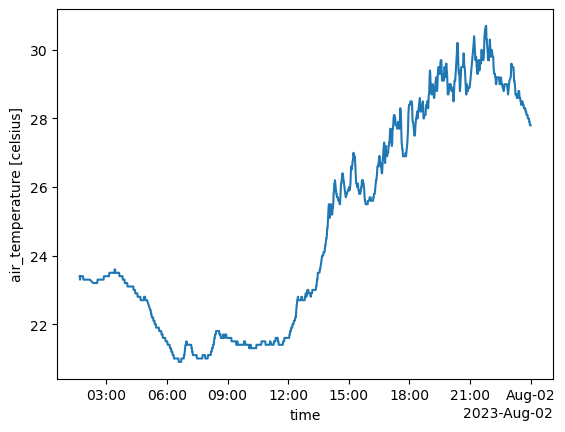

In [16]:
aqt_ds.temperature.sel(time=slice(DATE, DATE)).plot()

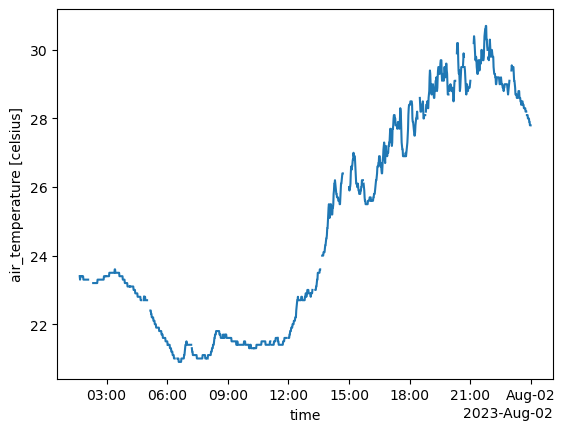

In [17]:
aqt_1min_ds.temperature.sel(time=slice(DATE, DATE)).plot()

## Time Series Analysis

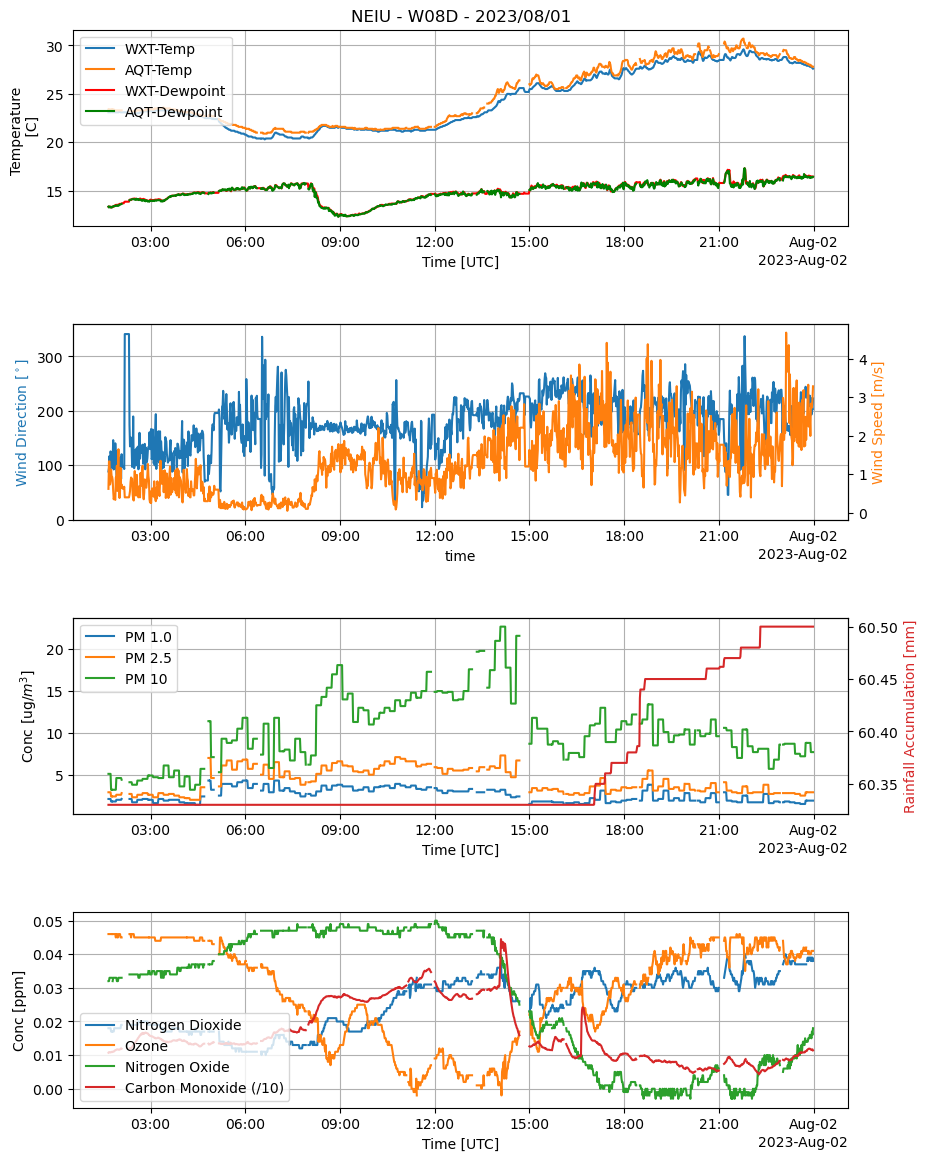

In [18]:
fig, axarr = plt.subplots(4, 1, figsize=[10, 14])
fig.subplots_adjust(hspace=0.5)

# --------------------------
# Air & Dewpoint Temperature
# --------------------------
wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.plot(ax=axarr[0],
                                                         label="WXT-Temp",
                                                        )
aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.plot(ax=axarr[0],
                                                         label="AQT-Temp",
                                                        )

wxt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.plot(ax=axarr[0],
                                                      label="WXT-Dewpoint",
                                                      color="red"
                                                     )
aqt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.plot(ax=axarr[0],
                                                                  label="AQT-Dewpoint",
                                                                  color='green')

newDate = DATE[0:4] + '/' + DATE[4:6] + '/' + DATE[6:8]

axarr[0].set_title("NEIU - W08D - " + newDate)
axarr[0].set_ylabel("Temperature \n [C]")
axarr[0].set_xlabel("Time [UTC]")
axarr[0].legend(loc="upper left")
axarr[0].grid(True)

# -------------------------
# Wind Direction and Speed
# -------------------------
ax2 = axarr[1].twinx()
wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_dir_10s.plot(ax=axarr[1],
                                                          label='Wind Direction',
                                                          color="tab:blue"
                                                         )
wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_mean_10s.plot(ax=ax2,
                                                           label="Wind Speed",
                                                           color="tab:orange"
                                                          )
axarr[1].set_ylim([0, 360])
axarr[1].grid(True)
axarr[1].set_ylabel(r'Wind Direction [$^\circ$]', color="tab:blue")
ax2.set_ylabel(r"Wind Speed [m/s]", color="tab:orange")

# -----------------------
# Particle Concentrations
# -----------------------
ax3 = axarr[2].twinx()
aqt_1min_ds["pm1.0"].sel(time=slice(DATE, DATE)).plot(ax=axarr[2],
                                                                  label="PM 1.0",
                                                                  )
aqt_1min_ds["pm2.5"].sel(time=slice(DATE, DATE)).plot(ax=axarr[2],
                                                                  label="PM 2.5",
                                                                  )
aqt_1min_ds["pm10.0"].sel(time=slice(DATE, DATE)).plot(ax=axarr[2],
                                                                   label="PM 10",
                                                                  )

axarr[2].set_ylabel(r"Conc [ug/$m^3$]")
axarr[2].set_xlabel("Time [UTC]")
axarr[2].legend(loc="upper left")
axarr[2].grid(True)
wxt_1min_ds.sel(time=slice(DATE, DATE)).rainfall.plot(ax=ax3,
                                                      color="tab:red")
ax3.set_ylabel(r"Rainfall Accumulation [mm]", color="tab:red")
                                                      

# -----------------------
# Gas Concentrations
# -----------------------
aqt_1min_ds["no2"].sel(time=slice(DATE, DATE)).plot(ax=axarr[3],
                                                                label="Nitrogen Dioxide",
                                                               )
aqt_1min_ds["o3"].sel(time=slice(DATE, DATE)).plot(ax=axarr[3],
                                                               label="Ozone",
                                                              )
aqt_1min_ds["no"].sel(time=slice(DATE, DATE)).plot(ax=axarr[3],
                                                               label="Nitrogen Oxide",
                                                              )
#aqt_1min_ds["co"].sel(time=slice("20230801", "20230801")).plot(ax=axarr[3],
#                                                               label="Carbon Monoxide (/10)",
#                                                              )
new_co = aqt_1min_ds["co"].sel(time=slice(DATE, DATE)).data / 10
axarr[3].plot(aqt_1min_ds["time"].sel(time=slice(DATE, DATE)), new_co, label="Carbon Monoxide (/10)")

axarr[3].set_ylabel(r"Conc [ppm]")
axarr[3].set_xlabel("Time [UTC]")
axarr[3].legend(loc="lower left")
axarr[3].grid(True)

plt.savefig('NEIU_W08D_' + DATE + '_timeseries.png')

## Intercomparison

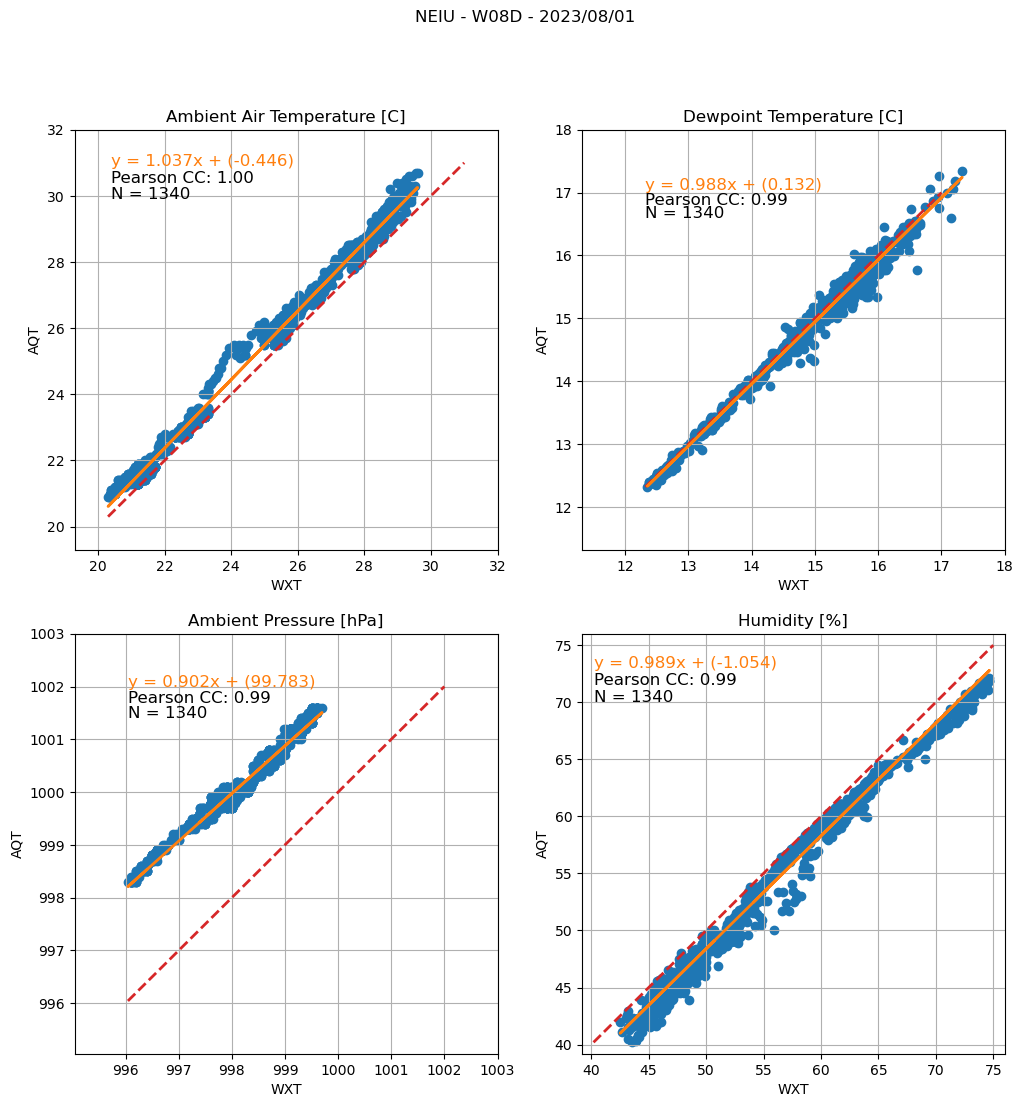

In [19]:
fig, axarr2 = plt.subplots(2, 2, figsize=[12, 12])
#fig.subplots_adjust(hspace=0.5)

newDate = DATE[0:4] + '/' + DATE[4:6] + '/' + DATE[6:8]
plt.suptitle("NEIU - W08D - " + newDate)

# ---------
# Air Temp
# ---------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.max(skipna=True).data)]
                )

axarr2[0, 0].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data,
                     aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data,
                     color="tab:blue"
)

axarr2[0, 0].set_xlim([var_min - 1, var_max + 1])
axarr2[0, 0].set_ylim([var_min - 1, var_max + 1])
axarr2[0, 0].set_title('Ambient Air Temperature [C]')
axarr2[0, 0].set_xlabel('WXT')
axarr2[0, 0].set_ylabel('AQT')
axarr2[0, 0].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[0, 0].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# Determine the best fit line
aqt = np.ma.masked_invalid(aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data)
wxt = np.ma.masked_invalid(wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data)
z = np.ma.polyfit(wxt, aqt, 1)
p = np.poly1d(z)
# Plot the best fit line
axarr2[0, 0].plot(wxt, p(wxt), 'tab:orange', linewidth=2)
# Display the line equation
axarr2[0, 0].text(var_min+0.1, var_max-0.1, f"y = {z[0]:.3f}x + ({z[1]:.3f})", color='tab:orange', fontsize=12)
# Calculate Pearson Correlation Coefficient
cc_conc = pearsonr(wxt, aqt)
# Display the Pearson CC
axarr2[0, 0].text(var_min+0.1, var_max-0.6, "Pearson CC: %.2f" % (cc_conc[0]), fontsize=12)
# Display the total number of samples
axarr2[0, 0].text(var_min+0.1, var_max-1.1, "N = %.0f" % (wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data.shape[0]), fontsize=12)

# ---------------
# Dew Point Temp
# ---------------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.max(skipna=True).data)]
                )

axarr2[0, 1].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.data,
                     aqt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.data
)

axarr2[0, 1].set_xlim([var_min - 1, var_max + 1])
axarr2[0, 1].set_ylim([var_min - 1, var_max + 1])
axarr2[0, 1].set_title('Dewpoint Temperature [C]')
axarr2[0, 1].set_xlabel('WXT')
axarr2[0, 1].set_ylabel('AQT')
axarr2[0, 1].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[0, 1].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# Determine the best fit line
aqt = np.ma.masked_invalid(aqt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.data)
wxt = np.ma.masked_invalid(wxt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.data)
z = np.ma.polyfit(wxt, aqt, 1)
p = np.poly1d(z)
# Plot the best fit line
axarr2[0, 1].plot(wxt, p(wxt), 'tab:orange', linewidth=2)
# Display the line equation
axarr2[0, 1].text(var_min, var_max+0.05, f"y = {z[0]:.3f}x + ({z[1]:.3f})", color='tab:orange', fontsize=12)
# Calculate Pearson Correlation Coefficient
cc_conc = pearsonr(wxt, aqt)
# Display the Pearson CC
axarr2[0, 1].text(var_min, var_max-0.2, "Pearson CC: %.2f" % (cc_conc[0]), fontsize=12)
# Display the total number of samples
axarr2[0, 1].text(var_min, var_max-0.4, "N = %.0f" % (wxt_1min_ds.sel(time=slice(DATE, DATE)).dewpoint.data.shape[0]), fontsize=12)

# ---------
# Pressure
# ---------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.max(skipna=True).data)]
                )

axarr2[1, 0].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data,
                     aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data
)

axarr2[1, 0].set_xlim([var_min - 1, var_max + 1])
axarr2[1, 0].set_ylim([var_min - 1, var_max + 1])
axarr2[1, 0].set_title('Ambient Pressure [hPa]')
axarr2[1, 0].set_xlabel('WXT')
axarr2[1, 0].set_ylabel('AQT')
axarr2[1, 0].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[1, 0].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# Determine the best fit line
aqt = np.ma.masked_invalid(aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data)
wxt = np.ma.masked_invalid(wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data)
z = np.ma.polyfit(wxt, aqt, 1)
p = np.poly1d(z)
# Plot the best fit line
axarr2[1, 0].plot(wxt, p(wxt), 'tab:orange', linewidth=2)
# Display the line equation
axarr2[1, 0].text(var_min, var_max, f"y = {z[0]:.3f}x + ({z[1]:.3f})", color='tab:orange', fontsize=12)
# Calculate Pearson Correlation Coefficient
cc_conc = pearsonr(wxt, aqt)
# Display the Pearson CC
axarr2[1, 0].text(var_min, var_max-0.3, "Pearson CC: %.2f" % (cc_conc[0]), fontsize=12)
# Display the total number of samples
axarr2[1, 0].text(var_min, var_max-0.6, "N = %.0f" % (wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data.shape[0]), fontsize=12)

# ---------
# Humidity
# ---------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.max(skipna=True).data)]
                )

axarr2[1, 1].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data,
                     aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data
)

axarr2[1, 1].set_xlim([var_min - 1, var_max + 1])
axarr2[1, 1].set_ylim([var_min - 1, var_max + 1])
axarr2[1, 1].set_title('Humidity [%]')
axarr2[1, 1].set_xlabel('WXT')
axarr2[1, 1].set_ylabel('AQT')
axarr2[1, 1].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[1, 1].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# Determine the best fit line
aqt = np.ma.masked_invalid(aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data)
wxt = np.ma.masked_invalid(wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data)
z = np.ma.polyfit(wxt, aqt, 1)
p = np.poly1d(z)
# Plot the best fit line
axarr2[1, 1].plot(wxt, p(wxt), 'tab:orange', linewidth=2)
# Display the line equation
axarr2[1, 1].text(var_min, var_max-2, f"y = {z[0]:.3f}x + ({z[1]:.3f})", color='tab:orange', fontsize=12)
# Calculate Pearson Correlation Coefficient
cc_conc = pearsonr(wxt, aqt)
# Display the Pearson CC
axarr2[1, 1].text(var_min, var_max-3.5, "Pearson CC: %.2f" % (cc_conc[0]), fontsize=12)
# Display the total number of samples
axarr2[1, 1].text(var_min, var_max-5, "N = %.0f" % (wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data.shape[0]), fontsize=12)

plt.savefig('NEIU_W08D_' + DATE + '_comparison.png')

## Intercomparison with Wind Speed / Direction

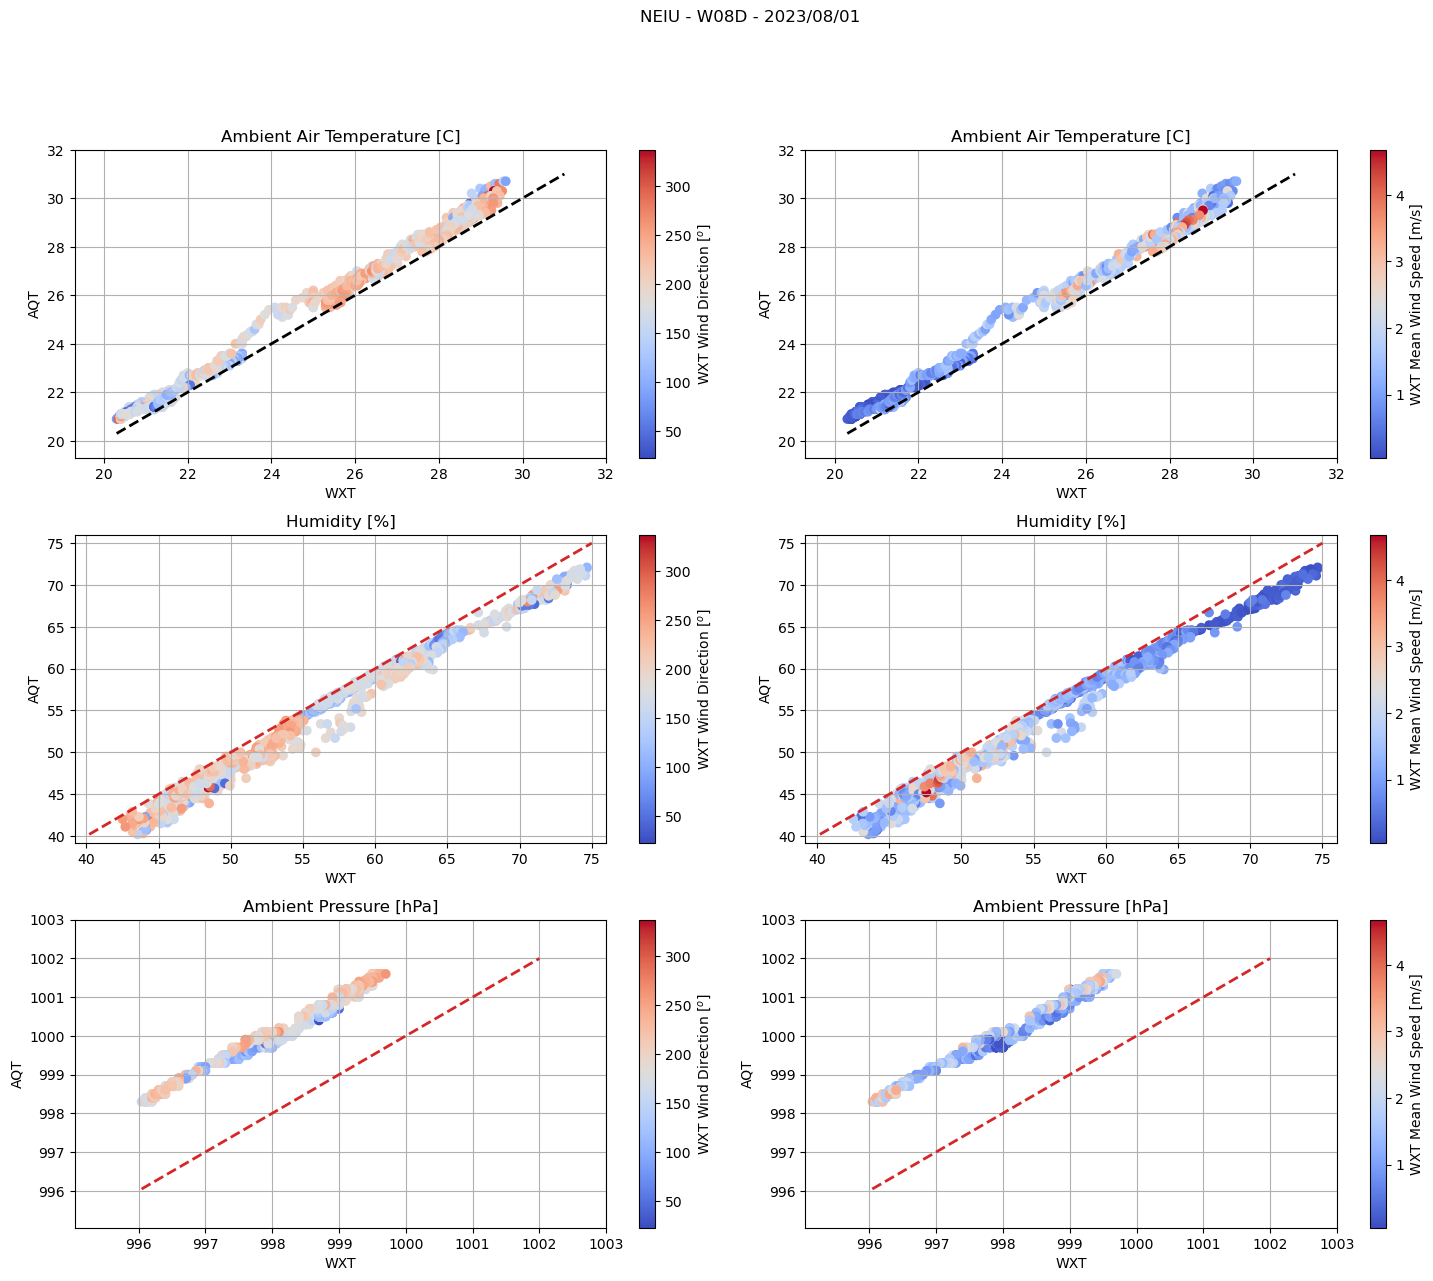

In [20]:
fig, axarr2 = plt.subplots(3, 2, figsize=[18, 14])
fig.subplots_adjust(hspace=0.25, wspace=0.1)

newDate = DATE[0:4] + '/' + DATE[4:6] + '/' + DATE[6:8]
plt.suptitle("NEIU - W08D - " + newDate)

# --------------------------
# Air Temp / Wind Direction
# --------------------------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.max(skipna=True).data)]
                )

scc = axarr2[0, 0].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data,
                           aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data,
                           c=wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_dir_10s.data,
                           cmap="coolwarm"
)

axarr2[0, 0].set_xlim([var_min - 1, var_max + 1])
axarr2[0, 0].set_ylim([var_min - 1, var_max + 1])
axarr2[0, 0].set_title('Ambient Air Temperature [C]')
axarr2[0, 0].set_xlabel('WXT')
axarr2[0, 0].set_ylabel('AQT')
axarr2[0, 0].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[0, 0].plot(ratio, ratio, color="k", linestyle="--", linewidth=2.0)
# plot the colorbar
cbar = plt.colorbar(scc)
cbar.ax.set_ylabel(r"WXT Wind Direction [$^o$]")

# ---------------------
# Air Temp / Wind Speed
# ---------------------
scc = axarr2[0, 1].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data,
                           aqt_1min_ds.sel(time=slice(DATE, DATE)).temperature.data,
                           c=wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_mean_10s.data,
                           cmap="coolwarm"
)

axarr2[0, 1].set_xlim([var_min - 1, var_max + 1])
axarr2[0, 1].set_ylim([var_min - 1, var_max + 1])
axarr2[0, 1].set_title('Ambient Air Temperature [C]')
axarr2[0, 1].set_xlabel('WXT')
axarr2[0, 1].set_ylabel('AQT')
axarr2[0, 1].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[0, 1].plot(ratio, ratio, color="k", linestyle="--", linewidth=2.0)
# plot the colorbar
cbar = plt.colorbar(scc)
cbar.ax.set_ylabel(r"WXT Mean Wind Speed [m/s]")

# --------------------------
# Humidity / Wind Direction
# --------------------------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.max(skipna=True).data)]
                )

scc = axarr2[1, 0].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data,
                           aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data,
                           c=wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_dir_10s.data,
                           cmap="coolwarm"
)

axarr2[1, 0].set_xlim([var_min - 1, var_max + 1])
axarr2[1, 0].set_ylim([var_min - 1, var_max + 1])
axarr2[1, 0].set_title('Humidity [%]')
axarr2[1, 0].set_xlabel('WXT')
axarr2[1, 0].set_ylabel('AQT')
axarr2[1, 0].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[1, 0].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# plot the colorbar
cbar = plt.colorbar(scc)
cbar.ax.set_ylabel(r"WXT Wind Direction [$^o$]")

# ----------------------
# Humidity / Wind Speed
# ----------------------
scc = axarr2[1, 1].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data,
                           aqt_1min_ds.sel(time=slice(DATE, DATE)).humidity.data,
                           c=wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_mean_10s.data,
                           cmap="coolwarm"
)

axarr2[1, 1].set_xlim([var_min - 1, var_max + 1])
axarr2[1, 1].set_ylim([var_min - 1, var_max + 1])
axarr2[1, 1].set_title('Humidity [%]')
axarr2[1, 1].set_xlabel('WXT')
axarr2[1, 1].set_ylabel('AQT')
axarr2[1, 1].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[1, 1].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# plot the colorbar
cbar = plt.colorbar(scc)
cbar.ax.set_ylabel(r"WXT Mean Wind Speed [m/s]")

# --------------------------
# Pressure / Wind Direction
# --------------------------
var_min = np.min([wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.min(skipna=True).data,
                 aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.min(skipna=True).data]
                )
var_max = np.max([np.round(wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.max(skipna=True).data),
                 np.round(aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.max(skipna=True).data)]
                )

scc = axarr2[2, 0].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data,
                           aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data,
                           c=wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_dir_10s.data,
                           cmap="coolwarm"
)

axarr2[2, 0].set_xlim([var_min - 1, var_max + 1])
axarr2[2, 0].set_ylim([var_min - 1, var_max + 1])
axarr2[2, 0].set_title('Ambient Pressure [hPa]')
axarr2[2, 0].set_xlabel('WXT')
axarr2[2, 0].set_ylabel('AQT')
axarr2[2, 0].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[2, 0].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# plot the colorbar
cbar = plt.colorbar(scc)
cbar.ax.set_ylabel(r"WXT Wind Direction [$^o$]")


# ---------------------
# Pressure / Wind Speed
# ---------------------

scc = axarr2[2, 1].scatter(wxt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data,
                           aqt_1min_ds.sel(time=slice(DATE, DATE)).pressure.data,
                           c=wxt_1min_ds.sel(time=slice(DATE, DATE)).wind_mean_10s.data,
                           cmap="coolwarm"
)

axarr2[2, 1].set_xlim([var_min - 1, var_max + 1])
axarr2[2, 1].set_ylim([var_min - 1, var_max + 1])
axarr2[2, 1].set_title('Ambient Pressure [hPa]')
axarr2[2, 1].set_xlabel('WXT')
axarr2[2, 1].set_ylabel('AQT')
axarr2[2, 1].grid(True)
# determine 1:1 ratio line
ratio = np.linspace(var_min, var_max)
axarr2[2, 1].plot(ratio, ratio, color="tab:red", linestyle="--", linewidth=2.0)
# plot the colorbar
cbar = plt.colorbar(scc)
cbar.ax.set_ylabel(r"WXT Mean Wind Speed [m/s]")


plt.savefig('NEIU_W08D_' + DATE + '_comparison_wind.png')